In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk import FreqDist
from wordcloud import WordCloud, STOPWORDS
import pycountry
import re

## **Proceso E.T.L.** *(Extract, Transform and Load)*

Se cargan los datos desde el archivo

In [203]:
df=pd.read_csv('AccidentesAviones.csv')

In [204]:
df

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


Se observa el contenido de algunas columnas

In [205]:
df = df.drop_duplicates()

In [206]:
df['summary']

0       During a demonstration flight, a U.S. Army fly...
1       Eugene Lefebvre was the first pilot to ever be...
2       First U.S. dirigible Akron exploded just offsh...
3       The first fatal airplane accident in Canada oc...
4       The airship flew into a thunderstorm and encou...
                              ...                        
5003    The sightseeing helicopter crashed after missi...
5004    While on final approach, in poor weather condi...
5005    The plane was carrying military personnel and ...
5006    While attempting to land at Jolo Airport, the ...
5007    The passenger plane crashed into the top of a ...
Name: summary, Length: 5008, dtype: object

In [207]:
df['fecha']

0       September 17, 1908
1       September 07, 1909
2            July 12, 1912
3          August 06, 1913
4       September 09, 1913
               ...        
5003        March 28, 2021
5004          May 21, 2021
5005         June 10, 2021
5006         July 04, 2021
5007         July 06, 2021
Name: fecha, Length: 5008, dtype: object

In [208]:
df['HORA declarada']

0        1718
1           ?
2        0630
3           ?
4        1830
        ...  
5003     1835
5004     1800
5005     0800
5006    11:30
5007     1500
Name: HORA declarada, Length: 5008, dtype: object

In [209]:
df['Ruta']

0                      Fort Myer, Virginia
1                  Juvisy-sur-Orge, France
2                Atlantic City, New Jersey
3       Victoria, British Columbia, Canada
4                       Over the North Sea
                       ...                
5003                    Near Butte, Alaska
5004                  Near Kaduna, Nigeria
5005            Near Pyin Oo Lwin, Myanmar
5006            Patikul, Sulu, Philippines
5007                        Palana, Russia
Name: Ruta, Length: 5008, dtype: object

### Nulos

Se observan nulos

In [210]:
df.isnull().sum()

Unnamed: 0                0
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     1
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64

Se aplica funcion lambda para convertir todos los '?' que figuran en el dataframe en Nan 

In [211]:
df=df.applymap(lambda x: np.nan if x== '?' else x)

C:\Users\nissi\AppData\Local\Temp\ipykernel_7380\3363908862.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(lambda x: np.nan if x== '?' else x)


Se observan nulos nuevamente

In [212]:
df.isnull().sum()

Unnamed: 0                   0
fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      763
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

Se reemplazan los valores Nan por 00:00 en la columna Hora declarada: Aqui se decide darle ese tratamiento a los datos nulos para poder proseguir con el análisis, luego se deberán excluir para un informe los accidentes que hayan ocurrido a la hora 00:00 porque no son reales. Ningún accidente ocurrio a esa hora

In [213]:
df['HORA declarada'].fillna('00:00', inplace=True)

Aquí se observa que los valores reemplazados de Nan a 00:00 fueron los 1504 que anteriormente existían, es decir que no hubo accidentes a esa hora

In [214]:
conteo_00_00 = (df['HORA declarada'] == '00:00').sum()
print(conteo_00_00)

1504


La siguiente función convierte los registros que no tengan ':' en su valor; a los que no tengan les agrega ceros a la izquierda para completar 4 cifras y divide los dos primeros valores antes de los ':' y los otros dos valores despues de los ':'

In [215]:
def convertir_a_hora_minuto(valor):
    if ':' not in valor:  
        valor = valor.zfill(4) 
        valor = f'{valor[:2]}:{valor[2:]}'
    return valor

df['HORA declarada'] = df['HORA declarada'].apply(convertir_a_hora_minuto)

In [216]:
num_tipos_operadores = df['HORA declarada'].nunique()
print(f'Cantidad de operadores: {num_tipos_operadores}')

Cantidad de operadores: 1103


In [217]:
df.rename(columns={'HORA declarada':'hora_declarada'},inplace=True)

Se observan valores con el caracter 'c:' o 'c' por lo que deberán ser reemplazados antes del análisis

In [218]:
df['hora_declarada'] = df['hora_declarada'].str.replace(r'c:|c', '', regex=True)

In [219]:
num_tipos_operadores = df['hora_declarada'].nunique()
print(f'Cantidad de operadores: {num_tipos_operadores}')

Cantidad de operadores: 1101


Convierto todas las horas dejando los minutos en 0 para un mejor análisis

In [220]:
df['hora_declarada'] = df['hora_declarada'].str.split(':').str[0].str.zfill(2) + ':00'

Verifico si quedaron datos que no sean validos en la columna 'hora_declarada', elimino espacios en blanco al principio y al final, si solo tienen dos digitos

In [221]:
def formatear_hora(hora):
    hora = hora.strip()
    partes = hora.split(':')
    if len(partes) != 2:
        return None
    hora_formateada = partes[0].rjust(2, '0') + ':' + partes[1].rjust(2, '0')
    return hora_formateada

df['hora_declarada'] = df['hora_declarada'].apply(formatear_hora)

In [222]:
num_tipos_operadores = df['hora_declarada'].unique()
print(f'Cantidad de operadores: {num_tipos_operadores}')

Cantidad de operadores: ['17:00' '00:00' '06:00' '18:00' '10:00' '01:00' '15:00' '23:00' '05:00'
 '08:00' '07:00' '21:00' '16:00' '12:00' '11:00' '13:00' '02:00' '09:00'
 '04:00' '14:00' '22:00' '20:00' '19:00' '03:00']


Se transforma columna 'fecha' a formato fecha

In [223]:
df['fecha']=pd.to_datetime(df['fecha'])

In [224]:
df['fecha']

0      1908-09-17
1      1909-09-07
2      1912-07-12
3      1913-08-06
4      1913-09-09
          ...    
5003   2021-03-28
5004   2021-05-21
5005   2021-06-10
5006   2021-07-04
5007   2021-07-06
Name: fecha, Length: 5008, dtype: datetime64[ns]

In [225]:
df['fecha'].isnull().sum()

0

Reemplazo valores nulos de la columna 'Ruta' por el término 'SinDato'

In [226]:
df['Ruta'].fillna('SinDato', inplace=True)

In [227]:
df['Ruta'].isnull().sum()

0

In [228]:
df.rename(columns={'Ruta':'ruta'},inplace=True)

Observo el formato de la columna 'ruta'

In [229]:
pd.set_option('display.max_rows', None) 
print(df['ruta'])
pd.reset_option('display.max_rows')  


0                                     Fort Myer, Virginia
1                                 Juvisy-sur-Orge, France
2                               Atlantic City, New Jersey
3                      Victoria, British Columbia, Canada
4                                      Over the North Sea
5                              Near Johannisthal, Germany
6                                         Tienen, Belgium
7                                   Off Cuxhaven, Germany
8                                   Near Jambol, Bulgeria
9                                     Billericay, England
10                                   Potters Bar, England
11                                         Mainz, Germany
12                           Off West Hartlepool, England
13                                     Near Gent, Belgium
14                                   Off Northern Germany
15                           Near Texel Island, North Sea
16                         Off Vlieland Island, North Sea
17            

Aqui el objetivo es normalizar la columna 'ruta' y dejarla solo con el pais. En primera instancia se utiliza el módulo pycountry pero no encuentra la totalidad de los paises, por lo que se decide copiar de la red el listado de 'paises del mundo'. Se crea una nueva columna 'pais' para completarla con los resultados encontrados

In [230]:
countries = [country.name for country in pycountry.countries]

In [231]:
paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy","Ivory Coast", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Nigeria", "Niger", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

def detectar_pais(ruta):
    for pais in paises:
        if re.search(rf'\b{pais}\b', ruta, re.IGNORECASE):
            return pais
    return 'Sin país'

df['pais'] = df['ruta'].apply(detectar_pais)
print(df[['ruta', 'pais']])

                                    ruta         pais
0                    Fort Myer, Virginia     Sin país
1                Juvisy-sur-Orge, France       France
2              Atlantic City, New Jersey     Sin país
3     Victoria, British Columbia, Canada       Canada
4                     Over the North Sea     Sin país
...                                  ...          ...
5003                  Near Butte, Alaska     Sin país
5004                Near Kaduna, Nigeria      Nigeria
5005          Near Pyin Oo Lwin, Myanmar      Myanmar
5006          Patikul, Sulu, Philippines  Philippines
5007                      Palana, Russia       Russia

[5008 rows x 2 columns]


Se observa que una gran cantidad han quedado 'sin pais' pero de esa cantidad muchos figuran con el nombre de estado de Estados Unidos, por lo que se toma de la red tambien un listado de los estados de Estados Unidos para que se reemplace en la columna 'pais' con el nombre 'Estados Unidos'

In [232]:
registros_sin_pais = df[df['pais'] == 'Sin país']
print(registros_sin_pais[['ruta', 'pais']])

                                  ruta      pais
0                  Fort Myer, Virginia  Sin país
2            Atlantic City, New Jersey  Sin país
4                   Over the North Sea  Sin país
8                Near Jambol, Bulgeria  Sin país
15        Near Texel Island, North Sea  Sin país
...                                ...       ...
4966                New York, New York  Sin país
4970  NW of Philadelphia, Pennsylvania  Sin país
4981                    Houston, Texas  Sin país
4989                      Toledo, Ohio  Sin país
5003                Near Butte, Alaska  Sin país

[1348 rows x 2 columns]


In [233]:
estados_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

def reemplazar_estados(ruta, pais_actual):
    if pais_actual == 'Sin país':
        for estado in estados_usa:
            if estado in ruta:
                return 'EE.UU'
    return pais_actual

df['pais'] = df.apply(lambda row: reemplazar_estados(row['ruta'], row['pais']), axis=1)
print(df[['ruta', 'pais']])

                                    ruta         pais
0                    Fort Myer, Virginia        EE.UU
1                Juvisy-sur-Orge, France       France
2              Atlantic City, New Jersey        EE.UU
3     Victoria, British Columbia, Canada       Canada
4                     Over the North Sea     Sin país
...                                  ...          ...
5003                  Near Butte, Alaska        EE.UU
5004                Near Kaduna, Nigeria      Nigeria
5005          Near Pyin Oo Lwin, Myanmar      Myanmar
5006          Patikul, Sulu, Philippines  Philippines
5007                      Palana, Russia       Russia

[5008 rows x 2 columns]


Ahora los registros que han quedado 'sin pais' son 371. Se decide prescindir de estos registros ya que no se puede diferenciar si corresponden a un pais, o tienen errores de tipeo en su nombre

In [234]:
registros_sin_pais = df[df['pais'] == 'Sin país']
print(registros_sin_pais[['ruta', 'pais']])

                                              ruta      pais
4                               Over the North Sea  Sin país
8                            Near Jambol, Bulgeria  Sin país
15                    Near Texel Island, North Sea  Sin país
16                  Off Vlieland Island, North Sea  Sin país
20                          Over the Mediterranean  Sin país
...                                            ...       ...
4935                   Bay of Bengal, Indian Ocean  Sin país
4938                       Russian Mission, Alaksa  Sin país
4954                    Near Itta Bena, Mississipi  Sin país
4959                Near Fond-du-Lac, Saskatchewan  Sin país
4961  Zhengchang, Suiyang County, Guizhou Province  Sin país

[371 rows x 2 columns]


In [235]:
df = df[df['pais'] != 'Sin país']

In [236]:
df=df.drop(columns='ruta')

En la columna 'OperadOR' quiero ver cuantos tipos de opearadores existen para saber si de algún modo de pueden unificar. Se observa que hay gran cantidad.

Se completan los datos faltantes (10) con la leyenda 'SinDato'

In [237]:
df['OperadOR'].fillna('SinDato', inplace=True)
num_tipos_operadores = df['OperadOR'].nunique()
print(f'Cantidad de operadores: {num_tipos_operadores}')


Cantidad de operadores: 2131


In [238]:
df['OperadOR'].isnull().sum()

0

In [239]:
df.rename(columns={'OperadOR':'operador'},inplace=True)

In [240]:

def normalize_operator_name(name):
    name = re.sub(r'[^a-zA-Z ]', '', name.lower())
    name = ' '.join(name.split())
    return name

df['operador'] = df['operador'].apply(normalize_operator_name)


In [241]:
mask = df['operador'].str.contains('military us', case=False)
df.loc[mask, 'operador'] = 'US Military'


In [242]:
mask = df['operador'].str.contains('private', case=False)
df.loc[mask, 'operador'] = 'Private'

In [243]:
mask = df['operador'].str.contains('aeroflot', case=False)
df.loc[mask, 'operador'] = 'Aeroflot'

In [244]:
mask = df['operador'].str.contains('royal air', case=False)
df.loc[mask, 'operador'] = 'Royal Air Force'

In [245]:
mask = df['operador'].str.contains('lufthansa', case=False)
df.loc[mask, 'operador'] = 'Lufthansa'

In [246]:
mask = df['operador'].str.contains('air france', case=False)
df.loc[mask, 'operador'] = 'Air France'

In [247]:
agrupados = df.groupby('operador').size().reset_index(name='Cantidad de Accidentes')
agrupados = agrupados.sort_values(by='Cantidad de Accidentes', ascending=False)
print(agrupados.head(10)) 

                                 operador  Cantidad de Accidentes
6                             US Military                     267
1                                Aeroflot                     257
4                                 Private                      71
3                               Lufthansa                      68
2                              Air France                      61
5                         Royal Air Force                      55
1905                     united air lines                      42
578   china national aviation corporation                      41
314                     american airlines                      36
1431           pan american world airways                      35


Despues de intentar una normalización manual, aun existe gran diversidad de operadores, por lo que se decide realizar un grafico de nube de palabras para ver cuales son las que mas se repiten

In [248]:
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens
df['operador'] = df['operador'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nissi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nissi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [249]:
df['operador'] = df['operador'].astype(str)
df['operador'] = df['operador'].apply(preprocess_text)

In [250]:
df = df.dropna(subset=['operador'])
all_words = [word for sublist in df['operador'] for word in sublist]
freq_dist = FreqDist(all_words)
common_words = freq_dist.most_common(10)
print(common_words)

[('air', 1155), ('airlines', 787), ('military', 635), ('airways', 392), ('force', 366), ('us', 307), ('aeroflot', 257), ('lines', 171), ('royal', 135), ('aviation', 133)]


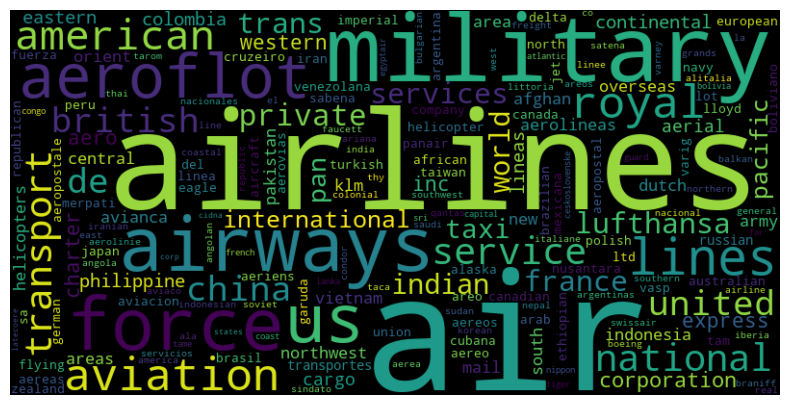

In [251]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [252]:
df['operador'] = df['operador'].apply(lambda x: ' '.join(x).replace(",", ""))

En la nube de palabras se observa gran cantidad de aparatos militares (no solo de EEUU), por lo que se decide avanzar agrupando los datos según el tipo de operador: Militares, Comerciales o Privados. Se verifica que todos hayan quedado clasificados

In [253]:
tipo_operadores = ["Militares", "Comerciales", "Privados"]

def detectar_operador(operador):
    operador = operador.lower()  
    if re.search(r'\bmilitary\b', operador):
        return 'Militares'
    elif re.search(r'\bprivate\b', operador):
        return 'Privados'
    else:
        return 'Comerciales'

df['tipo_operador'] = df['operador'].apply(detectar_operador)
print(df[['operador', 'tipo_operador']])


                           operador tipo_operador
0                       us military     Militares
1                           sindato   Comerciales
2                       us military     Militares
3                           private      Privados
5              military german navy     Militares
...                             ...           ...
5003              soloy helicopters   Comerciales
5004    military nigerian air force     Militares
5005     military myanmar air force     Militares
5006  military philippine air force     Militares
5007  kamchatka aviation enterprise   Comerciales

[4637 rows x 2 columns]


In [254]:
registros_vacios = df['tipo_operador'].isnull().sum()

if registros_vacios == 0:
    print("Todos los registros en la columna 'tipo_operador' están clasificados.")
else:
    print(f"Hay {registros_vacios} registros en la columna 'tipo_operador' que están vacíos o sin clasificar.")


Todos los registros en la columna 'tipo_operador' están clasificados.


In [255]:
df=df.drop(columns={'operador'})

Se observan datos faltantes y se completan con la leyenda 'SinDato'. Los datos faltantes son gran porcentaje por lo que mas tarde se decidirá como proceder con ésta columna

In [256]:
df['flight_no'].isnull().sum()

3380

In [257]:
df['flight_no'].fillna('SinDato', inplace=True)
df['flight_no'].isnull().sum()

0

In [258]:
df.rename(columns={'flight_no':'vuelo_nro'}, inplace=True)

Se completan nulos y se renombra. Mas tarde se verá el contenido ya que al parecer algunos registros contienen el motivo del vuelo y otros una ruta

In [259]:
df['route'].isnull().sum()

703

In [260]:
df['route'].fillna('SinDato',inplace=True)
df['route'].isnull().sum()
df.rename(columns={'route':'motivo_vuelo'},inplace=True)

In [261]:
df['motivo_vuelo']

0                      Demonstration
1                           Air show
2                        Test flight
3                            SinDato
5                            SinDato
                    ...             
5003             Sightseeing Charter
5004                         SinDato
5005            Naypyidaw - Anisakan
5006    Cagayan de Oro-Lumbia - Jolo
5007          Petropavlovsk - Palana
Name: motivo_vuelo, Length: 4637, dtype: object

Se eliminan nulos y se renombra columna 'tipo'

In [262]:
df['ac_type'].isnull().sum()
df['ac_type'].fillna('SinDato',inplace=True)
df['ac_type'].isnull().sum()
df.rename(columns={'ac_type':'tipo'},inplace=True)

In [263]:
num_tipos = df['tipo'].nunique()
print(f'Cantidad de tipos de aparatos: {num_tipos}')

Cantidad de tipos de aparatos: 2306


Se intenta normalizar la columna 'tipo' ya que hay gran variedad de modelos

In [264]:
agrupados = df.groupby('tipo').size().reset_index(name='Cantidad de Accidentes')
agrupados = agrupados.sort_values(by='Cantidad de Accidentes', ascending=False)
print(agrupados) 


                                          tipo  Cantidad de Accidentes
1049                              Douglas DC-3                     314
2246  de Havilland Canada DHC-6 Twin Otter 300                      68
966                              Douglas C-47A                      65
956                               Douglas C-47                      59
1099                              Douglas DC-4                      36
...                                        ...                     ...
836                            Convair CV-580F                       1
835      Convair CV-580/De Hav. Twin Otter 100                       1
834                Convair CV-580 / Cessna 150                       1
832                            Convair CV-440F                       1
2305                         deHavilland DH-86                       1

[2306 rows x 2 columns]


In [265]:
df.rename(columns={'tipo':'modelo'}, inplace=True)

Luego de haber observado y consultado por los modelos según el listado, se llega a la conclusión que los tipos de modelo de aeronaves pueden ser: helicópteros, aviones, dirigibles o globos aerostáticos, por lo que se decide proceder a la normalización según esos términos

In [266]:
tipo_modelo = ["Avion", "Dirigible", "Helicoptero", "Globo Aerostatico"]

def detectar_modelo(modelo):
    modelo = modelo.lower()  
    if re.search(r'\bairship\b', modelo):
        return 'Dirigible'
    elif re.search(r'\bhelicopter\b', modelo):
        return 'Helicoptero'
    elif re.search(r'\bballon\b', modelo):
        return 'Golbo Aerostatico'
    else:
        return 'Avion'

df['tipo_modelo'] = df['modelo'].apply(detectar_modelo)
print(df[['modelo', 'tipo_modelo']])

                             modelo tipo_modelo
0                  Wright Flyer III       Avion
1                    Wright Byplane       Avion
2                         Dirigible       Avion
3                  Curtiss seaplane       Avion
5            Zeppelin L-2 (airship)   Dirigible
...                             ...         ...
5003    Eurocopter AS350B3 Ecureuil       Avion
5004  Beechcraft B300 King Air 350i       Avion
5005               Beechcraft 1900D       Avion
5006       Lockheed C-130H Hercules       Avion
5007             Antonov An 26B-100       Avion

[4637 rows x 2 columns]


Se eliminan nulos y se renombra columna

In [267]:
df['registration'].isnull().sum()
df['registration'].fillna('SinDato',inplace=True)
df.rename(columns={'registration':'registro'},inplace=True)

In [268]:
df['registro'].isnull().sum()

0

Se eliminan nulos y se renombra columna 'serie'

In [269]:
df['cn_ln'].isnull().sum()

598

In [270]:
df.rename(columns={'cn_ln':'serie'},inplace=True)
df['serie'].fillna('SinDato',inplace=True)

In [271]:
df['serie'].isnull().sum()

0

Se observan nulos y se renombra columna 'total abordo' (por ahora no se reemplazan nulos)

In [272]:
df['all_aboard'].isnull().sum()

17

In [273]:
df.rename(columns={'all_aboard':'total_abordo'},inplace=True)

Se observan nulos y se renombra columna 'pasajeros_a_bordo' (por ahora no se reemplazan nulos)

In [274]:
df['PASAJEROS A BORDO'].isnull().sum()

193

In [275]:
df.rename(columns={'PASAJEROS A BORDO':'pasajeros_a_bordo'},inplace=True)

Se observan nulos y se renombra columna 'tripulacion_a_bordo' (por ahora no se reemplazan nulos)

In [276]:
df['crew_aboard'].isnull().sum()

193

In [277]:
df.rename(columns={'crew_aboard':'tripulacion_a_bordo'},inplace=True)

Se observan nulos y se renombra columna 'total_fallecidos' (por ahora no se reemplazan nulos)

In [278]:
df['cantidad de fallecidos'].isnull().sum()

8

In [279]:
df.rename(columns={'cantidad de fallecidos':'total_fallecidos'},inplace=True)

Se observan nulos y se renombra columna 'pasajeros_fallecidos' (por ahora no se reemplazan nulos)

In [280]:
df['passenger_fatalities'].isnull().sum()

207

In [281]:
df.rename(columns={'passenger_fatalities':'pasajeros_fallecidos'},inplace=True)

Se observan nulos y se renombra columna 'tripulacion_fallecidos' (por ahora no se reemplazan nulos)

In [282]:
df['crew_fatalities'].isnull().sum()

208

In [283]:
df.rename(columns={'crew_fatalities':'tripulacion_fallecidos'},inplace=True)

La columna 'danio_suelo' posee nulos, ver antes de tratarlos

In [284]:
df['ground'].isnull().sum()

41

In [285]:
print(type('ground'))

<class 'str'>


In [286]:
df.rename(columns={'ground':'danio_suelo'},inplace=True)

In [287]:
df.rename(columns={'summary':'resumen'},inplace=True)

Aqui se observa que con las columnas 'vuelo_nro', 'serie' y 'registro', 'Unnamed: 0', 'danio_suelo' no se puede llevar a cabo ningun análisis relevante por los que se decide eliminar estas columnas. La columna 'motivo_vuelo' tiene una gran cantidad de registros sin datos, ademas en gran cantidad se trata de una ruta y no un motivo, por lo que se elimina para éste informe.

In [288]:
columnas_eliminar = ['vuelo_nro', 'registro', 'serie', 'motivo_vuelo','danio_suelo', 'Unnamed: 0']
df_vuelos = df.drop(columnas_eliminar, axis=1)

### Outliers

Aqui comenzamos el tratamiento de outliers de la columna fecha, primero creo traigo la columna 'fechas' del df, y creo uno nuevo con dos columnas para evaluar la frecuencia

In [289]:
fechas = df_vuelos['fecha']

In [290]:
frecuencia_fechas = fechas.value_counts().reset_index()
frecuencia_fechas.columns = ['fecha', 'frecuencia']
frecuencia_fechas

,fecha,frecuencia
0,2001-09-11,4
1,1978-09-03,3
2,1992-08-27,3
3,1947-05-29,3
4,1946-12-25,3
...,...,...
4249,1959-05-21,1
4250,1959-06-01,1
4251,1959-06-05,1
4252,1959-06-23,1


In [291]:
fecha_inicio = df_vuelos['fecha'].min()
print(fecha_inicio)

1908-09-17 00:00:00


Cuento la diferencia de dias desde el primer accidente registrado hasta el mas actual

In [292]:
df_vuelos['dias_desde_referencia'] = (df_vuelos['fecha'] - fecha_inicio).dt.days

verifico outliers

In [293]:
Q1 = df_vuelos['dias_desde_referencia'].quantile(0.25)
Q3 = df_vuelos['dias_desde_referencia'].quantile(0.75)
IQR = Q3 - Q1

umbral_superior = Q3 + 1.5 * IQR
umbral_inferior = Q1 - 1.5 * IQR

outliers = df_vuelos[(df_vuelos['dias_desde_referencia'] < umbral_inferior) | (df_vuelos['dias_desde_referencia'] > umbral_superior)]


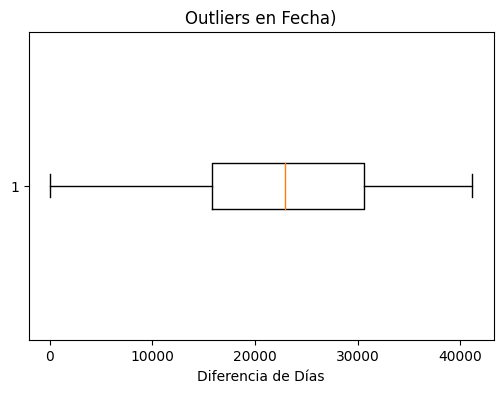

In [294]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_vuelos['dias_desde_referencia'], vert=False)
plt.xlabel('Diferencia de Días')
plt.title('Outliers en Fecha)')
plt.show()


No existen outliers en la columna 'fecha'

In [295]:
outliers

,fecha,hora_declarada,modelo,total_abordo,pasajeros_a_bordo,tripulacion_a_bordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecidos,resumen,pais,tipo_operador,tipo_modelo,dias_desde_referencia


Elimino columna auxiliar para la verificacion de atipicos de la columna 'fecha'

In [296]:
df_vuelos = df_vuelos.drop(columns=['dias_desde_referencia'])

Verifico atipicos de la columna 'hora'

se transforman las horas en minutos para detectar diferencias en las distancias

In [297]:
df_vuelos['hora_numeros']=df_vuelos['hora_declarada'].apply(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]))

In [298]:
Q1 = df_vuelos['hora_numeros'].quantile(0.25)
Q3 = df_vuelos['hora_numeros'].quantile(0.75)
IQR = Q3 - Q1

umbral_superior = Q3 + 1.5 * IQR
umbral_inferior = Q1 - 1.5 * IQR

outliers = df_vuelos[(df_vuelos['hora_numeros'] < umbral_inferior) | (df_vuelos['hora_numeros'] > umbral_superior)]

No existen outliers en la columna 'hora'

In [299]:
outliers

,fecha,hora_declarada,modelo,total_abordo,pasajeros_a_bordo,tripulacion_a_bordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecidos,resumen,pais,tipo_operador,tipo_modelo,hora_numeros


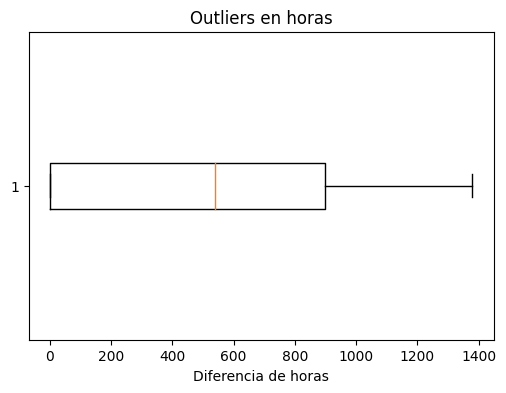

In [300]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_vuelos['hora_numeros'], vert=False)
plt.xlabel('Diferencia de horas')
plt.title('Outliers en horas')
plt.show()

Elimino columna creada para la deteccion de atipicos de la columna 'hora'

In [301]:
df_vuelos=df_vuelos.drop(columns=['hora_numeros'])

Detecto outliers en columna de cantidad de pasajeros y tripulacion, primero observo nulos

In [302]:
nan_tripulacion = df_vuelos['tripulacion_a_bordo'].isna().sum()
nan_pasajeros = df_vuelos['pasajeros_a_bordo'].isna().sum()
nan_total_abordo = df_vuelos['total_abordo'].isna().sum()

print(f'NaN en tripulacion_a_bordo: {nan_tripulacion} filas')
print(f'NaN en pasajeros_a_bordo: {nan_pasajeros} filas')
print(f'NaN en total_abordo: {nan_total_abordo} filas')


NaN en tripulacion_a_bordo: 193 filas
NaN en pasajeros_a_bordo: 193 filas
NaN en total_abordo: 17 filas


Reemplazo los valores Nan por ceros, ya que se considera que si un accidente no tiene las victimas registradas, no suma víctimas al informe

In [303]:
df_vuelos['total_abordo'] = df_vuelos['total_abordo'].fillna('0')
df_vuelos['pasajeros_a_bordo'] = df_vuelos['pasajeros_a_bordo'].fillna('0')
df_vuelos['tripulacion_a_bordo'] = df_vuelos['tripulacion_a_bordo'].fillna('0')

Se convierten los registros a enteros

In [304]:
df_vuelos['tripulacion_a_bordo'].astype(int)
df_vuelos['pasajeros_a_bordo'].astype(int)
df_vuelos['total_abordo'].astype(int)

0        2
1        1
2        5
3        1
5       28
        ..
5003     6
5004    11
5005    14
5006    96
5007    28
Name: total_abordo, Length: 4637, dtype: int32

In [305]:
df_vuelos['tripulacion_a_bordo'] = pd.to_numeric(df_vuelos['tripulacion_a_bordo'], errors='coerce')
df_vuelos['pasajeros_a_bordo'] = pd.to_numeric(df_vuelos['pasajeros_a_bordo'], errors='coerce')
df_vuelos['total_abordo'] = pd.to_numeric(df_vuelos['total_abordo'], errors='coerce')


Se comienza con la detección de outliers en 'total_abordo'

In [306]:
Q1 = df_vuelos['total_abordo'].quantile(0.25)
Q3 = df_vuelos['total_abordo'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = df_vuelos[(df_vuelos['total_abordo'] < limite_inferior) | (df_vuelos['total_abordo'] > limite_superior)]

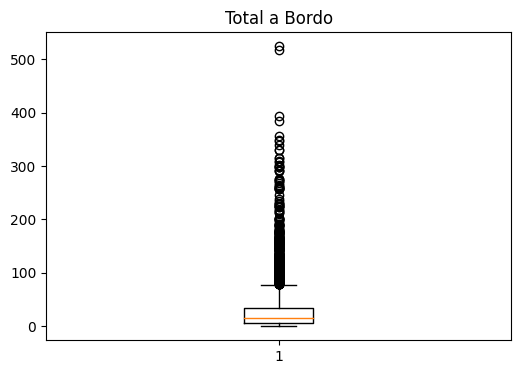

In [307]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_vuelos['total_abordo'])
plt.title('Total a Bordo')
plt.show()

Aquí se observa que los valores mas altos (de mas de 500 pasajeros/tripulacion) corresponde a naves de dimensiones aptas para esa capacidad de personas por lo que no se descartan los atípicos. (Boeing-747)

In [308]:
filas_con_pasajeros_altos = valores_atipicos[valores_atipicos['total_abordo'] > 500]
print(filas_con_pasajeros_altos)

          fecha hora_declarada             modelo  total_abordo  \
3341 1985-08-12          18:00  Boeing B-747-SR46           524   
4219 1999-07-23          11:00       Boeing B-747           517   

      pasajeros_a_bordo  tripulacion_a_bordo total_fallecidos  \
3341                509                   15              520   
4219                503                   14                1   

     pasajeros_fallecidos tripulacion_fallecidos  \
3341                  505                     15   
4219                    0                      1   

                                                resumen   pais tipo_operador  \
3341  The aircraft suffered an aft pressure bulkhead...  Japan   Comerciales   
4219  Two minutes after taking off from Haneda Airpo...  Japan   Comerciales   

     tipo_modelo  
3341       Avion  
4219       Avion  


Se comienza con la deteccion de outliers en 'tripulación_a_bordo'

In [309]:
Q1 = df_vuelos['tripulacion_a_bordo'].quantile(0.25)
Q3 = df_vuelos['tripulacion_a_bordo'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = df_vuelos[(df_vuelos['tripulacion_a_bordo'] < limite_inferior) | (df_vuelos['tripulacion_a_bordo'] > limite_superior)]

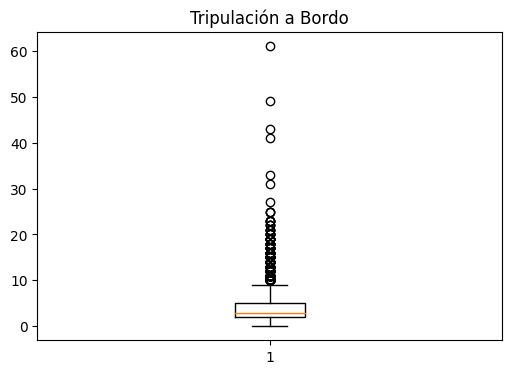

In [310]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_vuelos['tripulacion_a_bordo'])
plt.title('Tripulación a Bordo')
plt.show()

Se considera que los valores atípicos pueden ser reales ya que las naves livianas, como zepelin pueden tener esa cantidad de personas para tripular dicha nave

In [311]:
filas_con_pasajeros_altos = valores_atipicos[valores_atipicos['tripulacion_a_bordo'] > 40]
print(filas_con_pasajeros_altos)

         fecha hora_declarada                               modelo  \
6   1915-03-05          01:00               Zeppelin L-8 (airship)   
60  1921-08-24          17:00   Royal Airship Works ZR-2 (airship)   
102 1925-09-03          05:00  Dirigible ZR-1 Shenandoah (airship)   
462 1937-05-06          19:00                      Zeppelin LZ-129   

     total_abordo  pasajeros_a_bordo  tripulacion_a_bordo total_fallecidos  \
6              41                  0                   41               17   
60             49                  0                   49               43   
102            43                  0                   43               14   
462            97                 36                   61               35   

    pasajeros_fallecidos tripulacion_fallecidos  \
6                      0                     17   
60                     0                     43   
102                    0                     14   
462                   13                     22   

  

Se comienza con la deteccion de outliers en 'pasajeros_a_bordo'

In [312]:
Q1 = df_vuelos['pasajeros_a_bordo'].quantile(0.25)
Q3 = df_vuelos['pasajeros_a_bordo'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = df_vuelos[(df_vuelos['pasajeros_a_bordo'] < limite_inferior) | (df_vuelos['pasajeros_a_bordo'] > limite_superior)]

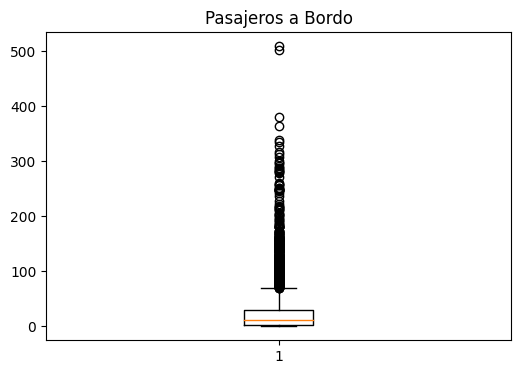

In [313]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_vuelos['pasajeros_a_bordo'])
plt.title('Pasajeros a Bordo')
plt.show()

Al igual que las otras dos variables, los atípicos pueden ser reales, ya que se trata de Boeing 747

In [314]:
filas_con_pasajeros_altos = valores_atipicos[valores_atipicos['pasajeros_a_bordo'] > 500]
print(filas_con_pasajeros_altos)

          fecha hora_declarada             modelo  total_abordo  \
3341 1985-08-12          18:00  Boeing B-747-SR46           524   
4219 1999-07-23          11:00       Boeing B-747           517   

      pasajeros_a_bordo  tripulacion_a_bordo total_fallecidos  \
3341                509                   15              520   
4219                503                   14                1   

     pasajeros_fallecidos tripulacion_fallecidos  \
3341                  505                     15   
4219                    0                      1   

                                                resumen   pais tipo_operador  \
3341  The aircraft suffered an aft pressure bulkhead...  Japan   Comerciales   
4219  Two minutes after taking off from Haneda Airpo...  Japan   Comerciales   

     tipo_modelo  
3341       Avion  
4219       Avion  


Reemplazo los valores Nan por ceros, ya que se considera que si un accidente no tiene las victimas registradas, no suma víctimas al informe

In [315]:
df_vuelos['total_fallecidos'] = df_vuelos['total_fallecidos'].fillna('0')
df_vuelos['pasajeros_fallecidos'] = df_vuelos['pasajeros_fallecidos'].fillna('0')
df_vuelos['tripulacion_fallecidos'] = df_vuelos['tripulacion_fallecidos'].fillna('0')

Se convierten a numericos

In [316]:
df_vuelos['total_fallecidos'] = pd.to_numeric(df_vuelos['total_fallecidos'], errors='coerce')
df_vuelos['pasajeros_fallecidos'] = pd.to_numeric(df_vuelos['pasajeros_fallecidos'], errors='coerce')
df_vuelos['tripulacion_fallecidos'] = pd.to_numeric(df_vuelos['tripulacion_fallecidos'], errors='coerce')

se comienza con la deteccion de outliers en  'total_fallecidos'

In [317]:
Q1 = df_vuelos['total_fallecidos'].quantile(0.25)
Q3 = df_vuelos['total_fallecidos'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = df_vuelos[(df_vuelos['total_fallecidos'] < limite_inferior) | (df_vuelos['total_fallecidos'] > limite_superior)]

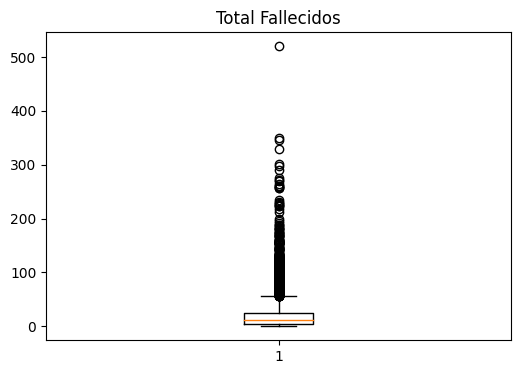

In [318]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_vuelos['total_fallecidos'])
plt.title('Total Fallecidos')
plt.show()

Se consideran reales los atipicos por tratarse de boeing 747

In [319]:
filas_con_pasajeros_altos = valores_atipicos[valores_atipicos['total_fallecidos'] > 400]
print(filas_con_pasajeros_altos)

          fecha hora_declarada             modelo  total_abordo  \
3341 1985-08-12          18:00  Boeing B-747-SR46           524   

      pasajeros_a_bordo  tripulacion_a_bordo  total_fallecidos  \
3341                509                   15               520   

      pasajeros_fallecidos  tripulacion_fallecidos  \
3341                   505                      15   

                                                resumen   pais tipo_operador  \
3341  The aircraft suffered an aft pressure bulkhead...  Japan   Comerciales   

     tipo_modelo  
3341       Avion  


Se comienza con la deteccion de outliers en 'pasajeros_fallecidos'

In [320]:
Q1 = df_vuelos['pasajeros_fallecidos'].quantile(0.25)
Q3 = df_vuelos['pasajeros_fallecidos'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = df_vuelos[(df_vuelos['pasajeros_fallecidos'] < limite_inferior) | (df_vuelos['pasajeros_fallecidos'] > limite_superior)]

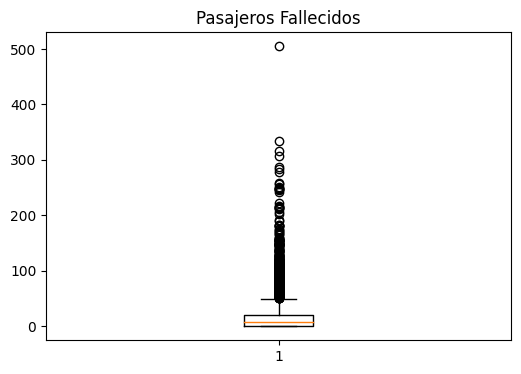

In [321]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_vuelos['pasajeros_fallecidos'])
plt.title('Pasajeros Fallecidos')
plt.show()

Se consideran reales los valores atípicos

In [322]:
filas_con_pasajeros_altos = valores_atipicos[valores_atipicos['pasajeros_fallecidos'] > 400]
print(filas_con_pasajeros_altos)

          fecha hora_declarada             modelo  total_abordo  \
3341 1985-08-12          18:00  Boeing B-747-SR46           524   

      pasajeros_a_bordo  tripulacion_a_bordo  total_fallecidos  \
3341                509                   15               520   

      pasajeros_fallecidos  tripulacion_fallecidos  \
3341                   505                      15   

                                                resumen   pais tipo_operador  \
3341  The aircraft suffered an aft pressure bulkhead...  Japan   Comerciales   

     tipo_modelo  
3341       Avion  


Se comiena con la deteccion de outliers en 'tripulación_fallecidos'

In [323]:
Q1 = df_vuelos['tripulacion_fallecidos'].quantile(0.25)
Q3 = df_vuelos['tripulacion_fallecidos'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = df_vuelos[(df_vuelos['tripulacion_fallecidos'] < limite_inferior) | (df_vuelos['tripulacion_fallecidos'] > limite_superior)]

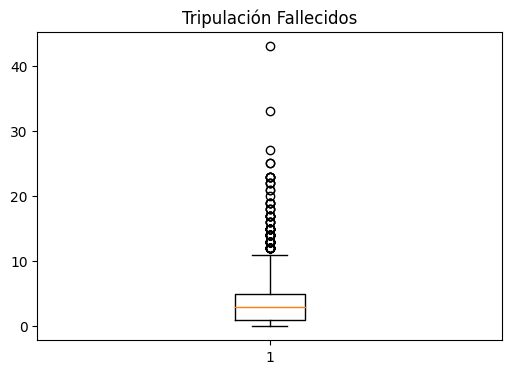

In [324]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_vuelos['tripulacion_fallecidos'])
plt.title('Tripulación Fallecidos')
plt.show()

Se considera que los outliers ya que pueden ser valores reales, considerando el tipo de nave

In [325]:
filas_con_pasajeros_altos = valores_atipicos[valores_atipicos['tripulacion_fallecidos'] > 25]
print(filas_con_pasajeros_altos)

          fecha hora_declarada                                modelo  \
60   1921-08-24          17:00    Royal Airship Works ZR-2 (airship)   
3027 1979-06-07          11:00          Hindustan Aeronautics 748-2M   
4057 1996-11-12          18:00  Boeing B-747-168B / Ilyushin IL-76TD   

      total_abordo  pasajeros_a_bordo  tripulacion_a_bordo  total_fallecidos  \
60              49                  0                   49                43   
3027            27                  0                   27                27   
4057           349                316                   33               349   

      pasajeros_fallecidos  tripulacion_fallecidos  \
60                       0                      43   
3027                     0                      27   
4057                   316                      33   

                                                resumen     pais  \
60    Crashed due to structural failure followed by ...  England   
3027  Crashed near the Karmwal Pass a

In [326]:
df_vuelos

,fecha,hora_declarada,modelo,total_abordo,pasajeros_a_bordo,tripulacion_a_bordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecidos,resumen,pais,tipo_operador,tipo_modelo
0,1908-09-17,17:00,Wright Flyer III,2,1,1,1,1,0,"During a demonstration flight, a U.S. Army fly...",EE.UU,Militares,Avion
1,1909-09-07,00:00,Wright Byplane,1,0,1,1,0,0,Eugene Lefebvre was the first pilot to ever be...,France,Comerciales,Avion
2,1912-07-12,06:00,Dirigible,5,0,5,5,0,5,First U.S. dirigible Akron exploded just offsh...,EE.UU,Militares,Avion
3,1913-08-06,00:00,Curtiss seaplane,1,0,1,1,0,1,The first fatal airplane accident in Canada oc...,Canada,Privados,Avion
5,1913-10-17,10:00,Zeppelin L-2 (airship),28,0,0,28,0,0,Hydrogen gas which was being vented was sucked...,Germany,Militares,Dirigible
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,18:00,Eurocopter AS350B3 Ecureuil,6,5,1,5,4,1,The sightseeing helicopter crashed after missi...,EE.UU,Comerciales,Avion
5004,2021-05-21,18:00,Beechcraft B300 King Air 350i,11,7,4,11,7,4,"While on final approach, in poor weather condi...",Nigeria,Militares,Avion
5005,2021-06-10,08:00,Beechcraft 1900D,14,12,2,12,11,1,The plane was carrying military personnel and ...,Myanmar,Militares,Avion
5006,2021-07-04,11:00,Lockheed C-130H Hercules,96,88,8,50,0,0,"While attempting to land at Jolo Airport, the ...",Philippines,Militares,Avion


## **Proceso E.D.A.** *(Exploratory Data Analysis)*

Se observa la distribución de variables numéricas

Tal como se esperaba hay una relación lineal entre el total a bordo y el numero de fallecidos

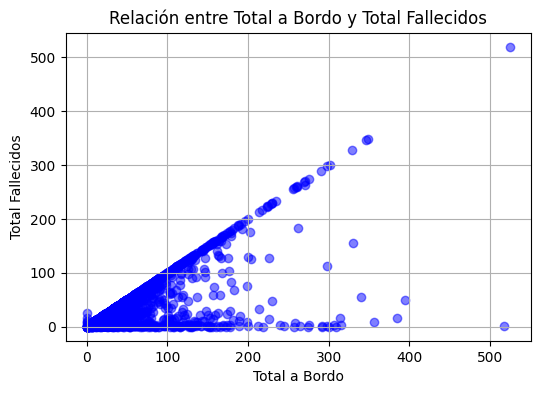

In [327]:
total_abordo = df_vuelos['total_abordo']
total_fallecidos = df_vuelos['total_fallecidos']

plt.figure(figsize=(6, 4))
plt.scatter(total_abordo, total_fallecidos, alpha=0.5, color='blue')
plt.title('Relación entre Total a Bordo y Total Fallecidos')
plt.xlabel('Total a Bordo')
plt.ylabel('Total Fallecidos')
plt.grid(True)
plt.show()

Con la matriz de correlación de variables podemos ver la relación que existe entre las variables numericas, de nuevo afirmando el gráfico anterior, muestra una muy fuerte correlación entre el total de personas a bordo y el total de pasajeros a bordo, y aunque un poco mas baja también una muy fuerte relación con la tripulación a bordo, los cual indica que generalmente es mayor el número de pasajeros, por lo mismo tiende a haber menos fallecidos en la tripulación que entre los pasajeros. El daño que causa en suelo el accidente no se relaciona de manera significativa con las otras variables. 

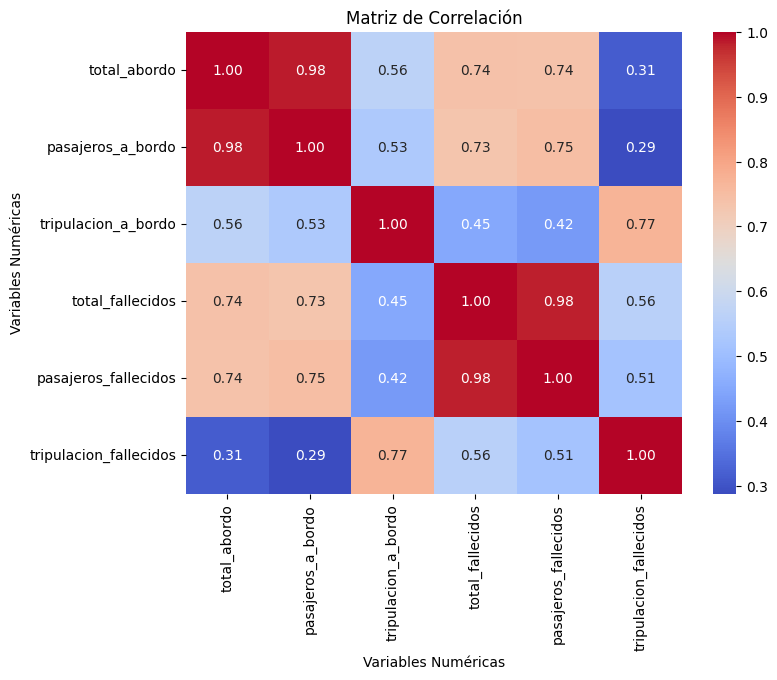

In [328]:
columnas_numericas = ['total_abordo', 'pasajeros_a_bordo', 'tripulacion_a_bordo', 'total_fallecidos', 'pasajeros_fallecidos', 'tripulacion_fallecidos']
matriz_correlacion = df_vuelos[columnas_numericas].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matriz de Correlación')
plt.xlabel('Variables Numéricas')
plt.ylabel('Variables Numéricas')

plt.show()

Sacamos las medidas de tendencia de las columnas numericas, donde podemos ver por ejemplo, que el promedio de personas a bordo (31) y el promedio de fallecidos (22), es muy similar, que en el mayor siniestro que se produjo murieron 520 personas.

In [329]:
df_vuelos.describe()

,fecha,total_abordo,pasajeros_a_bordo,tripulacion_a_bordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecidos
count,4637,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000
mean,1971-12-04 00:09:56.247573888,30.824887,25.583783,4.277334,22.146862,18.010352,3.399181
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1951-12-29 00:00:00,6.000000,2.000000,2.000000,4.000000,0.000000,1.000000
50%,1971-07-30 00:00:00,16.000000,11.000000,3.000000,11.000000,7.000000,3.000000
75%,1992-09-12 00:00:00,35.000000,29.000000,5.000000,25.000000,20.000000,5.000000
max,2021-07-06 00:00:00,524.000000,509.000000,61.000000,520.000000,505.000000,43.000000
std,NaN,44.131197,42.132932,3.550309,34.070623,32.619494,3.139416


Se analizan las variables categóricas por separado

Se analizan los tipos de apartos mas comunes en accidentes

In [330]:
conteo_tipos_aparatos = df_vuelos['tipo_modelo'].value_counts()
print(conteo_tipos_aparatos)

tipo_modelo
Avion          4558
Helicoptero      60
Dirigible        19
Name: count, dtype: int64


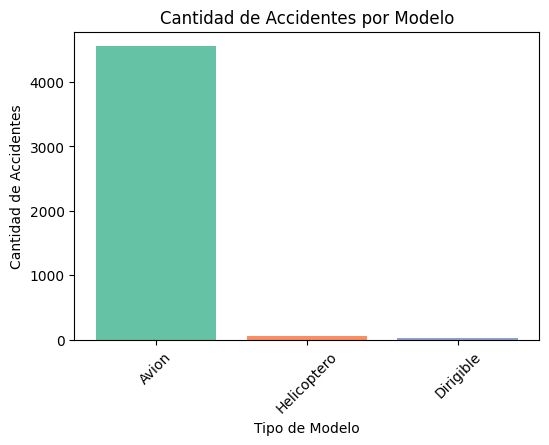

In [331]:
conteo_tipos_modelo = df_vuelos['tipo_modelo'].value_counts()

tipos_modelo = conteo_tipos_modelo.index
conteos = conteo_tipos_modelo.values

colores = sns.color_palette('Set2', len(tipos_modelo))

plt.figure(figsize=(6, 4))
plt.bar(tipos_modelo, conteos, color=colores)
plt.xlabel('Tipo de Modelo')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes por Modelo')

plt.xticks(rotation=45) 
plt.show()

Graficamos los modelos mas comunes

c:\Users\nissi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nissi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nissi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


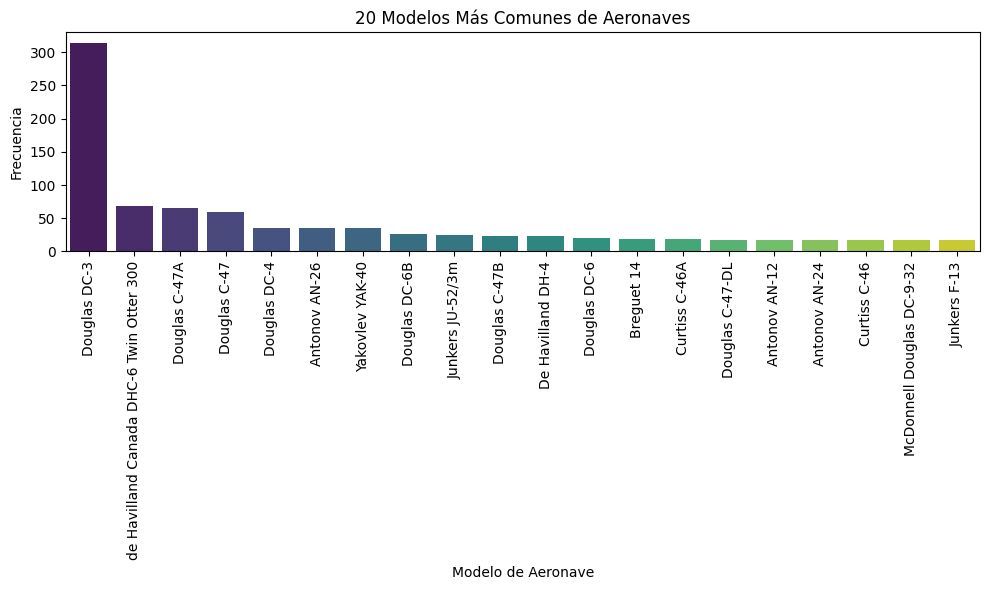

In [332]:
conteo_modelos = df_vuelos['modelo'].value_counts().head(20)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=conteo_modelos.index, y=conteo_modelos.values, palette='viridis', ax=ax)

ax.set_title('20 Modelos Más Comunes de Aeronaves')
ax.set_xlabel('Modelo de Aeronave')
ax.set_ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

También los operadores mas comunes

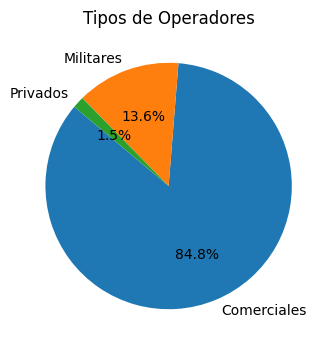

In [333]:
conteo_tipo_operador = df['tipo_operador'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(conteo_tipo_operador, labels=conteo_tipo_operador.index, autopct='%1.1f%%', startangle=140)
plt.title('Tipos de Operadores')
plt.show()


Se observa la relacion entre las variables categoricas 'tipo_operador' y 'modelo'. En los 10 modelos mas comunes, casi en su totalidad han sido aviones comerciales.

<Figure size 1200x400 with 0 Axes>

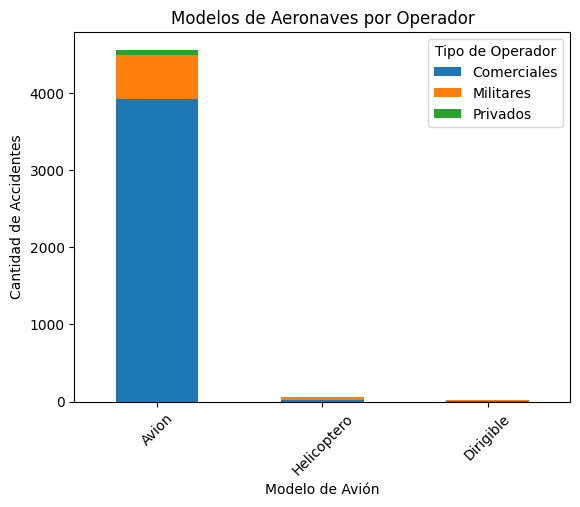

In [334]:
conteo_accidentes = df_vuelos.groupby(['tipo_modelo', 'tipo_operador']).size().unstack(fill_value=0)

modelos = conteo_accidentes.sum(axis=1).nlargest(10).index
conteo_modelos = conteo_accidentes.loc[modelos]

plt.figure(figsize=(12, 4))
ax = conteo_modelos.plot(kind='bar', stacked=True)
plt.xlabel('Modelo de Avión')
plt.ylabel('Cantidad de Accidentes')
plt.title('Modelos de Aeronaves por Operador')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Operador', loc='upper right')
plt.show()

Invierto la relación

<Figure size 1200x400 with 0 Axes>

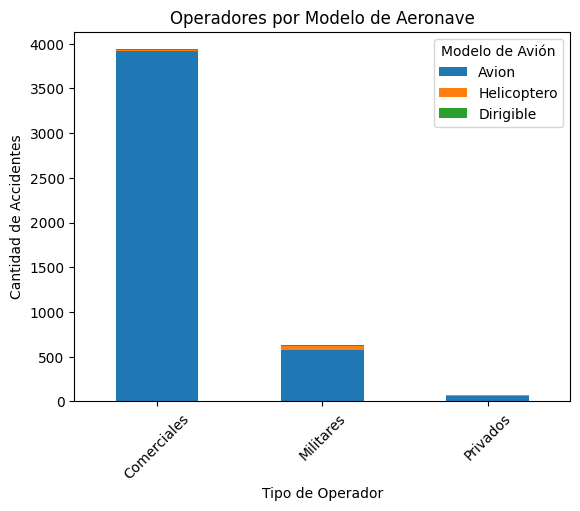

In [335]:

conteo_accidentes = df_vuelos.groupby(['tipo_modelo', 'tipo_operador']).size().unstack(fill_value=0)

modelos = conteo_accidentes.sum(axis=1).nlargest(10).index
conteo_modelos = conteo_accidentes.loc[modelos]

plt.figure(figsize=(12, 4))
ax = conteo_modelos.T.plot(kind='bar', stacked=True)  

plt.xlabel('Tipo de Operador')
plt.ylabel('Cantidad de Accidentes')
plt.title('Operadores por Modelo de Aeronave')
plt.xticks(rotation=45)
plt.legend(title='Modelo de Avión', loc='upper right')
plt.show()



Se destacan las palabras mas comunes en el resumen del accidente

Convierto los tokens en una cadena de texto

In [336]:
df_vuelos['resumen'] = df_vuelos['resumen'].apply(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)

se realiza el procesamiento de texto

In [337]:
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower().translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        return ' '.join(tokens)
    else:
        return text

df_vuelos['resumen'] = df_vuelos['resumen'].apply(preprocess_text)


Analizo la columna 'resumen'. La transformo a string

Calculo la frecuencia de las palabras, aplico nuevamente la funcion pues no la habia ejecutado a una cadena de texto, sino a una lsita

In [338]:
df_vuelos['resumen'] = df_vuelos['resumen'].apply(preprocess_text)
df_vuelos['resumen'] = df_vuelos['resumen'].astype(str)

all_words = [word for text in df_vuelos['resumen'] for word in text.split()]
freq_dist = FreqDist(all_words)
common_words = freq_dist.most_common(10)

print(common_words)

[('crashed', 3163), ('aircraft', 2371), ('plane', 2060), ('flight', 1047), ('crew', 996), ('runway', 985), ('pilot', 944), ('engine', 931), ('approach', 924), ('failure', 803)]


Grafico la nube de palabras para la columna 'resúmen'. Aqui vemos que las palabras (traducidas al español) 'estrellado', 'aeronave', 'avión', 'vuelo', 'tripulacion', 'pista', 'piloto', 'aproximacion', 'fallo', son las mas usadas en los resúmenes de los accidentes. Casi lógicas. Por ello, excluyo estas palabras y grafico las siguientes para ampliar las ideas de aproximación a los motivos de los accidentes para una posible reduccion de los mismos. 

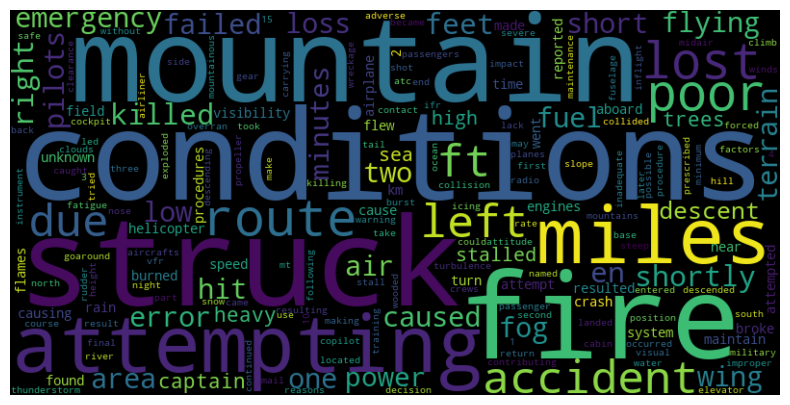

In [339]:
words_20 = freq_dist.most_common(20)
words_to_exclude = set(word for word, _ in words_20)

filtered_freq_dist = {word: freq for word, freq in freq_dist.items() if word not in words_to_exclude}
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(filtered_freq_dist)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Para éste gráfico se filtró la hora 00:00 ya que ese valor se colocó a los registros con datos faltantes, por lo que no sería real colocarlos 

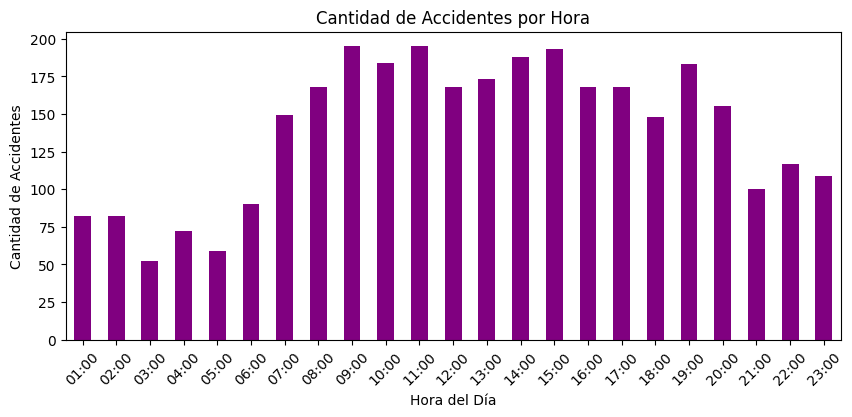

In [343]:
df_filtered = df_vuelos[df_vuelos['hora_declarada'] != '00:00']
colores = ['purple']
accidentes_por_hora = df_filtered['hora_declarada'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
accidentes_por_hora.plot(kind='bar', color=colores)
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes por Hora')
plt.xticks(rotation=45)
plt.show()

### *En el análisis exploratorio realizado se pueden observar algunos puntos:* 
* Hay una correlacion muy fuerte entre la cantidad de pasajeros en la aeronave y la cantidad de fallecidos, también aunque en menos medida con la cantidad de tripulantes.
* El promedio de personas en el aparato es de 31 personas de las cuales 22 personas fallecieron.
* Vemos una gran variedad de tipos de aeronaves destacando que el tipo 'Douglas DC-3' representa casi el 7% del total.
* Los aviones militares de diferentes naciones representan el 13% de los accidentes y los privados representan un 1,5%, el resto son comerciales.
* Con el procesamiento de lenguaje logramos ver que existen palabras comunes en los resúmenes como 'avión', 'tripulación', 'piloto', 'fallo'... Aunque haciendo una inspección mas profunda se pueden ver palabras como: 'montañas', 'condiciones', 'golpear'; por lo que se puede tener una idea aproximada a pensar que las condiciones climáticas y la presencia de montañas han sido factores intervinientes en los accidentes. 
* Con la gráfica de 'fechas' podemos observar que se dá un pronunciamiento marcado en la cuarta decada del siglo XX, posiblemente determinada por las guerras mas significativas (Segunda Guerra Mundial y Guerra de Vietnam), y también se evidencia un descenso a comienzos del siglo XXI, posiblemente se puede ingerir un avance tecnológico y en medidas de seguridad determinante para la prevención de accidentes.
* La mayor proporción de accidentes han sucedido en horas del día.


In [344]:
df_vuelos

,fecha,hora_declarada,modelo,total_abordo,pasajeros_a_bordo,tripulacion_a_bordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecidos,resumen,pais,tipo_operador,tipo_modelo
0,1908-09-17,17:00,Wright Flyer III,2,1,1,1,1,0,demonstration flight us army flyer flown orvil...,EE.UU,Militares,Avion
1,1909-09-07,00:00,Wright Byplane,1,0,1,1,0,0,eugene lefebvre first pilot ever killed air ac...,France,Comerciales,Avion
2,1912-07-12,06:00,Dirigible,5,0,5,5,0,5,first us dirigible akron exploded offshore alt...,EE.UU,Militares,Avion
3,1913-08-06,00:00,Curtiss seaplane,1,0,1,1,0,1,first fatal airplane accident canada occurred ...,Canada,Privados,Avion
5,1913-10-17,10:00,Zeppelin L-2 (airship),28,0,0,28,0,0,hydrogen gas vented sucked forward engine igni...,Germany,Militares,Dirigible
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,18:00,Eurocopter AS350B3 Ecureuil,6,5,1,5,4,1,sightseeing helicopter crashed missing top 600...,EE.UU,Comerciales,Avion
5004,2021-05-21,18:00,Beechcraft B300 King Air 350i,11,7,4,11,7,4,final approach poor weather conditions aircraf...,Nigeria,Militares,Avion
5005,2021-06-10,08:00,Beechcraft 1900D,14,12,2,12,11,1,plane carrying military personnel monks crashe...,Myanmar,Militares,Avion
5006,2021-07-04,11:00,Lockheed C-130H Hercules,96,88,8,50,0,0,attempting land jolo airport military transpor...,Philippines,Militares,Avion


In [302]:
df_vuelos.to_csv('vuelos.csv', index=False)